In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2

In [2]:
# Rotate an image in form of numpy array 
# and return rotated image in the same form

def rotate_image(image_array: np.array, angle: int) -> np.array:

    image = image_array.copy()

    height, width = image.shape[:2]
    diagonal = np.sqrt(height ** 2 + width ** 2)
    padding = int((diagonal - min(height, width)) / 2)

    # Add padding to the image using BORDER_REFLECT or BORDER_REPLICATE mode
    padded_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REFLECT)

    # Calculate the center of the padded image
    center_x = width // 2 + padding
    center_y = height // 2 + padding

    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle, 1.0)

    # Apply the rotation to the padded image
    rotated = cv2.warpAffine(padded_image, rotation_matrix, (padded_image.shape[1], padded_image.shape[0]), flags=cv2.INTER_LINEAR)

    # Crop the rotated image to remove the padding
    rotated_cropped = rotated[padding:-padding, padding:-padding]

    return rotated_cropped


In [3]:
# visualize original image vs the rotated image
def visualize(original, rotated):
    
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
    
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title('Augmented image')
    plt.imshow(rotated_rgb)
    plt.axis("off")

In [4]:
path = '../Bsd_Bootcamp/Project/data/'

In [7]:
df = pd.read_csv(path + 'dataset.csv')
df.head()

,Unnamed: 0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label,source
0,0,59,62,63,43,46,45,50,48,43,...,184,140,151,118,84,123,92,72,6,cifar-10
1,1,154,177,187,126,137,136,105,104,95,...,133,139,143,134,142,143,133,144,9,cifar-10
2,2,255,255,255,253,253,253,253,253,253,...,85,83,79,85,83,80,86,84,9,cifar-10
3,3,28,25,10,37,34,19,38,35,20,...,47,28,63,56,37,72,65,46,4,cifar-10
4,4,170,180,198,168,178,196,177,185,203,...,79,82,71,75,78,73,77,80,1,cifar-10


In [8]:
df_cifar10 = df[df['source'] == 'cifar-10']
df_cifar10 = df_cifar10[df_cifar10.columns[1:]]

In [9]:
labels = df_cifar10['label'].unique()

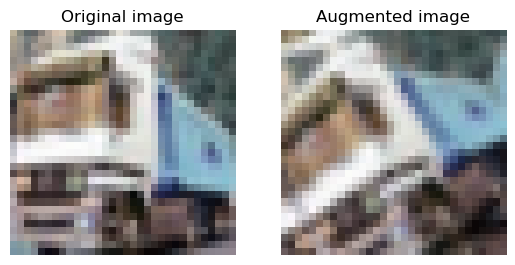

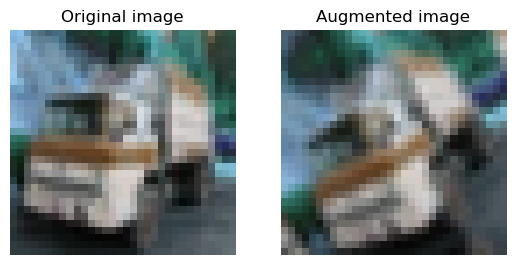

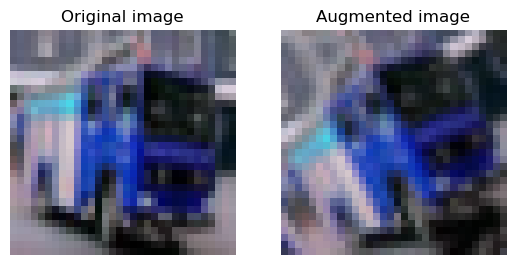

In [12]:
# ---------------------------------------------------------------
# TOY EXAMPLE
# ---------------------------------------------------------------
rotated_cifar10 = pd.DataFrame()
angle = 30
pixels = [col for col in df_cifar10.columns if col.startswith('pixel')]

for label in labels[1:2]:
    # create a DataFrame of the current label class
    df_class = df_cifar10[df_cifar10['label'] == label]
    # take only half class
    half_class_to_rotate = df_class.iloc[:df_class.shape[0]//2]
    half_class_to_save = df_class.iloc[df_class.shape[0]//2:]
    rotated_cifar10 = pd.concat([rotated_cifar10, half_class_to_save])
    
    for i in range(0, half_class_to_rotate.shape[0], 100):
        image_pixels = half_class_to_rotate[pixels].iloc[i]
        image_array = image_pixels.values.reshape(32,32,3).astype('uint8')
        rotated_image = rotate_image(image_array, angle)
        if i == 0 or i % 1000 == 0:
            visualize(image_array, rotated_image)
        
        rotated_image_df = pd.DataFrame(rotated_image.reshape(1, -1), columns=pixels)
        rotated_image_df['label'] = label
        rotated_image_df['source'] = 'cifar-10 rotated'
        
        rotated_cifar10 = pd.concat([rotated_cifar10, rotated_image_df])
#         df_cifar10_rotated.append(rotated_image)

In [15]:
def rotate_half_of_CIFAR_10(df_cifar10: pd.DataFrame) -> pd.DataFrame:
    rotated_cifar10 = pd.DataFrame()
    angle = 30
    pixels = [col for col in df_cifar10.columns if col.startswith('pixel')]

    for label in labels:
        # create a DataFrame of the current label class
        df_class = df_cifar10[df_cifar10['label'] == label]
        # take only half class
        half_class_to_rotate = df_class.iloc[:df_class.shape[0]//2]
        half_class_to_save = df_class.iloc[df_class.shape[0]//2:]
        rotated_cifar10 = pd.concat([rotated_cifar10, half_class_to_save])

        for i in range(half_class_to_rotate.shape[0]):
            image_pixels = half_class_to_rotate[pixels].iloc[i]
            image_array = image_pixels.values.reshape(32,32,3).astype('uint8')
            rotated_image = rotate_image(image_array, angle)
            rotated_image_df = pd.DataFrame(rotated_image.reshape(1, -1), columns=pixels)
            rotated_image_df['label'] = label
            rotated_image_df['source'] = 'cifar-10 rotated'
            rotated_cifar10 = pd.concat([rotated_cifar10, rotated_image_df])
        
    return rotated_cifar10   

In [16]:
rotated_cifar10 = rotate_half_of_CIFAR_10(df_cifar10)

In [17]:
rotated_cifar10.to_csv(path + 'rotated_cifar10.csv', index=False)

In [18]:
rotated_cifar10.shape

(60000, 3074)

In [23]:
rotated_cifar10.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_3064', 'pixel_3065', 'pixel_3066', 'pixel_3067', 'pixel_3068',
       'pixel_3069', 'pixel_3070', 'pixel_3071', 'label', 'source'],
      dtype='object', length=3074)

### TEST - Rotation by visualization the images

In [97]:
# visualize but smaller figure than the previous function

In [94]:
# visualize original image vs the rotated image
def visualize(original, rotated):
    
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
    
    fig = plt.figure(figsize=(2, 2))
    
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(original_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title('Rotated')
    plt.imshow(rotated_rgb)
    plt.axis("off")

In [95]:
def test_cifar10_rotation(df_cifar10, df_rotated_cifar10):
    class_size = 6000
    img_index = 3000
    labels = df_cifar10['label'].unique()
    pixels = [col for col in df_cifar10.columns if col.startswith('pixel')]
    
    # only pixels of images (without label and source etc. columns)
    df_rotated_cifar10 = df_rotated_cifar10[pixels]
    
    # for each label test rotation by visualization
    for i, label in enumerate(labels):
        
        # origin CIFAR-10 class of current label        
        df_class = df_cifar10[df_cifar10['label'] == label]
        
        # only pixels of image (without label and source etc. columns)
        df_class = df_class[pixels]
        
        # first image of current class in the origin CIFAR-10
        origin_img = df_class.iloc[0:1].values.reshape(32,32,3).astype('uint8')
        
        # the corresponded image in the rotated version
        rotated_img = df_rotated_cifar10.iloc[(img_ind + class_size * i):(img_ind + class_size * i +1)].values.reshape(32,32,3).astype('uint8')
        
        visualize(origin_img, rotated_img)

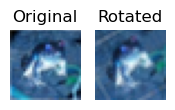

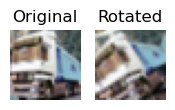

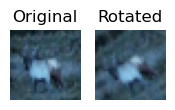

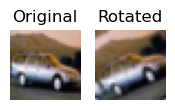

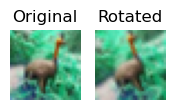

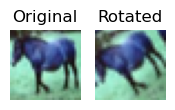

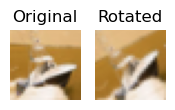

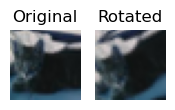

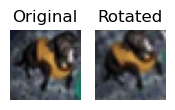

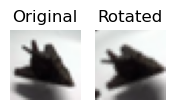

In [96]:
test_cifar10_rotation(df_cifar10, rotated_cifar10)

In [ ]:
# little example

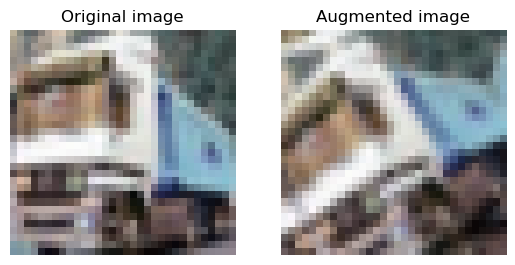

In [66]:
dfd = df_cifar10[df_cifar10['label'] == labels[1]]
dfd = dfd[pixels]
visualize(dfd.iloc[0:1].values.reshape(32,32,3).astype('uint8'), rotated_cifar10[pixels].iloc[9000:9001].values.reshape(32,32,3).astype('uint8'))

In [31]:
def visualize_image(img_array):
    
    img_array_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    
    fig = plt.figure(figsize=(1, 1))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array_rgb)
    plt.axis("off")


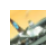

In [32]:
visualize_image(rotated_cifar10[pixels].iloc[-1].values.reshape(32,32,3).astype('uint8'))

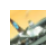

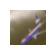

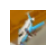

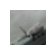

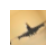

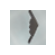

In [33]:
for i in range(1, 7):
    visualize_image(rotated_cifar10[pixels].iloc[(rotated_cifar10.shape[0]-i)].values.reshape(32,32,3).astype('uint8'))